# Assessing the Effect of Makam on Metrical Strength in Turkish Makam Music 
## Dougal Shakespeare, Francessca Ronchini

**Jobs still to do**:
* Replicate metrical strength for usuls
* Collect Data-sets together 
* Normalise counts on histogram

In [55]:
from music21 import *
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# TODO: change paths to your own dirs
#xml_path = '/media/dshakes/Elements/Turkish-makam/SymbTr-2.4.3/MusicXML/'
#pdf_path = '/media/dshakes/Elements/Turkish-makam/SymbTr-2.4.3/SymbTr-pdf/'
xml_path = '/Users/francescaronchini/repo/makam_project/makam/MusicXML_research/'
pdf_path = '/Users/francescaronchini/repo/makam_project/makam/SymbTr-pdf/'
#musescore_path = '/home/dshakes/Desktop/MuseScore-3.4.2-x86_64.AppImage'

In [130]:
# Config Muse Score
#us = environment.UserSettings()
#us.create()
#us['musicxmlPath'] = musescore_path # Path to MuseScore3.exe
#us['ipythonShowFormat'] = 'musicxml'

## Pre-processing and Balancing of Data

In [29]:
#getting all the list of the different makam and usul used for each pdf file
usul = []
makam = []
for makam_file in os.listdir(pdf_path):
    if makam_file[-3:] == 'pdf':
        usul.append(makam_file.split('--')[2])
        makam.append(makam_file.split('--')[0])

In [31]:
#value count of different usul
pd.Series(usul).value_counts()

aksak                319
sofyan               293
duyek                278
aksaksemai           128
curcuna              111
                    ... 
3334                   1
devriaryan             1
murekkepnimsofyan      1
tekvurus               1
yuruksofyan            1
Length: 88, dtype: int64

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    a = pd.Series(usul).value_counts()

In [40]:
# Output makam / ursul distribution for all ursuls which have > 5 occurances in a makam
makams = pd.DataFrame(np.array([usul, makam]).T, columns=['usul', 'makam'])
makamsdf = makams.groupby(['makam', 'usul']).filter(lambda x: len(x) > 5)
makamsdf = makamsdf.groupby(['makam', 'usul'])['makam'].count() 

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(makamsdf)

makam            usul       
acemasiran       agiraksak       7
                 aksak           9
                 duyek           7
acemkurdi        aksak           6
beyati           agiraksak       7
                 aksak           7
                 aksaksemai      7
                 duyek          11
buselik          duyek          10
                 sofyan          6
evic             aksak           8
gerdaniye        sofyan          8
hicaz            agiraksak      12
                 aksak          26
                 curcuna         9
                 duyek          19
                 nimsofyan      12
                 semai           8
                 senginsemai     6
                 sofyan         20
                 turkaksagi      8
hicaz_humayun    sofyan          6
hicazkar         aksak          11
                 devrihindi      8
                 duyek          15
                 sofyan          7
huseyni          agiraksak       6
                 aksak    

In [49]:
# aksak                  319 <- weights in paper
# sofyan                 293 <- weights in paper
# duyek                  278 <- weights in paper
# aksaksemai             128 <- need to find these weights

high_pop_usuls = ['aksak', 'sofyan', 'duyek', 'aksaksemai'] #select 4 most popular ursuls for meaningful analysis
filtered_makams = makams.loc[makams['usul'].isin(high_pop_usuls)] #select makams which contain those usul
filtered_makams = filtered_makams.groupby(['makam', 'usul']).filter(lambda x: len(x) > 3) #remove usul occurances with <= 3
df = pd.DataFrame({'count' : filtered_makams.groupby( [ "makam", "usul"] ).size()}).reset_index()

# remove all makams which do not appear in all 4 usuls
vc = df['makam'].value_counts()
vc = vc[vc == 4].index
df = df.loc[df['makam'].isin(vc)]

# output chosen makams and usul counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

              makam        usul  count
0        acemasiran       aksak      9
1        acemasiran  aksaksemai      4
2        acemasiran       duyek      7
3        acemasiran      sofyan      5
6            beyati       aksak      7
7            beyati  aksaksemai      7
8            beyati       duyek     11
9            beyati      sofyan      4
27          huseyni       aksak     15
28          huseyni  aksaksemai      5
29          huseyni       duyek      7
30          huseyni      sofyan     17
34         karcigar       aksak      8
35         karcigar  aksaksemai      4
36         karcigar       duyek      8
37         karcigar      sofyan      4
39  kurdilihicazkar       aksak     13
40  kurdilihicazkar  aksaksemai      4
41  kurdilihicazkar       duyek      6
42  kurdilihicazkar      sofyan      5
43            mahur       aksak     18
44            mahur  aksaksemai      5
45            mahur       duyek     16
46            mahur      sofyan     10
74            ussak      

## Hard Coded Usul Weights
All apart from aksaksemai usul weights we consider are already defined in the following paper which we consider as a baseline [1].

Aksaksemai usul

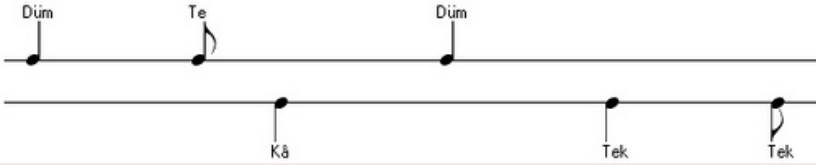

We calculate the weighted metrical distribution for the Aksaksemai usul by considering the weightings defined in the Mus2okr software as considered in the bassline paper.

[1] http://mtg.upf.edu/node/3886

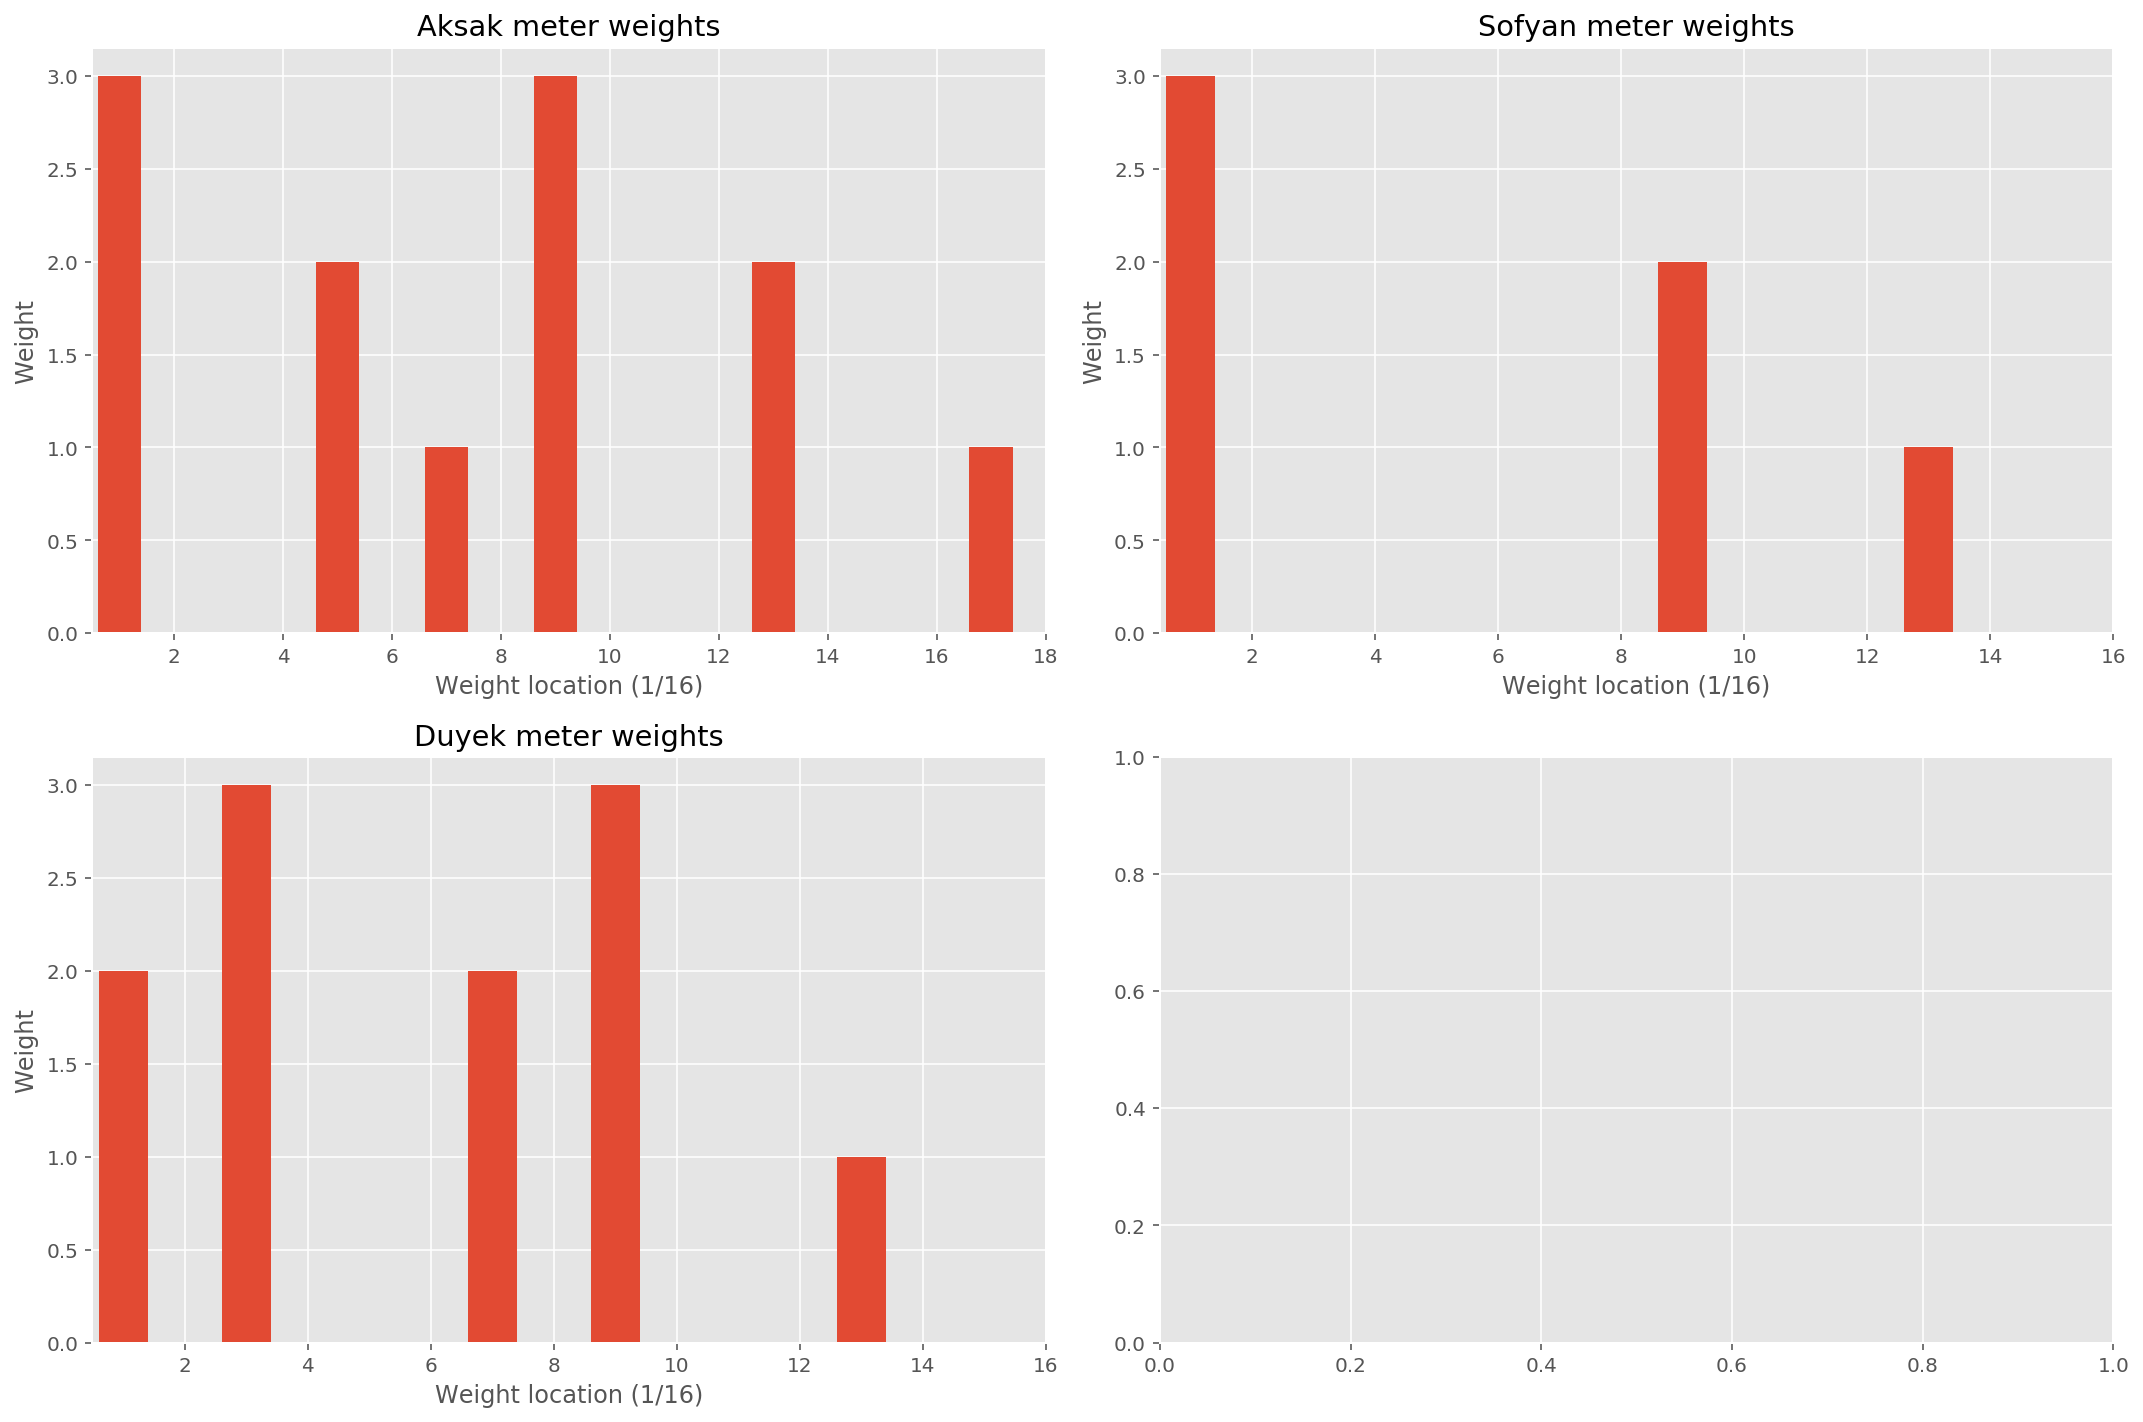

In [128]:
# aksak                  319 <- weights in paper
# sofyan                 293 <- weights in paper
# duyek                  278 <- weights in paper
# aksak_semai             128 <- need to find these weights
# dum, te, ka, tek weights needed to calculate aksaksemai

aksak_weights = [3, 0, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 2, 0, 0, 0, 1, 0]
sofyan_weights = [3,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0]
duyek_weights = [2,0,3,0,0,0,2,0,3,0,0,0,1,0,0,0]
aksak_semai_weights = [] #need to find thre weigths

#tempo is different according to the maka
#todo: some usul, even if the same they have different tempo
#considering the 16 as the smallest note
usul_tempo = {
    "aksak": [9, 8], 
    "sofyan": [4, 4], 
    "duyek": [8, 8] 
}

plt.style.use('ggplot')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(10)
fig.set_figwidth(15)

#creating a dictionary to save bins needed to plot the histogram for every usul
usul_bins = {}
for usul in usul_tempo:
    y_bins = (16/usul_tempo[usul][1]) * usul_tempo[usul][0]
    usul_bins[usul] = int(y_bins)
 

#create plot
# usul aksak
ax1.bar(np.arange(1, usul_bins["aksak"]+1, dtype=int), aksak_weights)
ax1.set_xlabel("Weight location (1/16)")
ax1.set_xlim(0.5, usul_bins["aksak"])
ax1.set_ylabel("Weight")
ax1.set_title('Aksak meter weights')

#usul sofyan
ax2.bar(np.arange(1, usul_bins["sofyan"]+1, dtype=int), sofyan_weights)
ax2.set_xlabel("Weight location (1/16)")
ax2.set_xlim(0.5, usul_bins["sofyan"])
ax2.set_ylabel("Weight")
ax2.set_title('Sofyan meter weights')

#usul duyek
ax3.bar(np.arange(1, usul_bins["duyek"]+1, dtype=int), duyek_weights)
ax3.set_xlabel("Weight location (1/16)")
ax3.set_xlim(0.5, usul_bins["duyek"])
ax3.set_ylabel("Weight")
ax3.set_title('Duyek meter weights')
 
#Create names on the x-axis
#plt.xticks(y_pos, bars)
 
#Show graphic
plt.tight_layout()
plt.show()

## Working with makam scores
Most of makam scores have non standard key signatures, and this might cause problems.

Music21 was not developed with makam music in mind, and many of the accidentals used in makam music are not recognized by music21.

In [1]:
# path to test xml file
makamScore = '../makam/segah--sazsemaisi--aksaksemai----hizir_aga.xml'

music21 doesn't accept double-slash-flat as accidental
music21 doesn't accept slash-flat as accidental
music21 doesn't accept slash-quarter-sharp as accidental
music21 doesn't accept slash-sharp as accidental


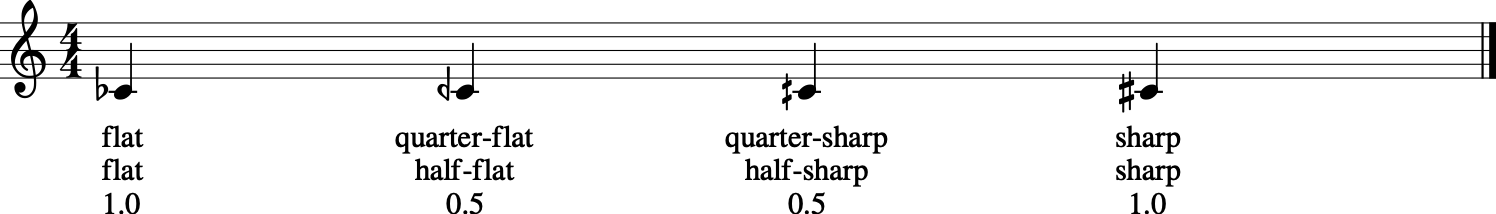

In [5]:
# these are the names of all the accidentals used in makam scores, as contained in the MusicXML files
makamAccidentals = ['double-slash-flat', 'flat', 'slash-flat', 'quarter-flat', 'quarter-sharp', 'sharp', 'slash-quarter-sharp', 'slash-sharp']

# create a stream to contained altered notes
makamNotes = stream.Stream()

for i in range(len(makamAccidentals)): # create a note per accidental
    try:
        n = note.Note()
        n.pitch.accidental = makamAccidentals[i] # add one accidental from the list
        n.addLyric(makamAccidentals[i], applyRaw=True) # add the name of the accidental as lyric
        n.addLyric(n.pitch.accidental.name, applyRaw=True) # add the name used by music21 as lyric
        n.addLyric(n.pitch.accidental.alter) # add the number of semitones of the accidental as lyric
        makamNotes.append(n)
    except:
        print("music21 doesn't accept {} as accidental".format(makamAccidentals[i]))

makamNotes.show()

Since the problem when loading the score with music21 is the non standard key signature, one solution might be to manipulate the MusicXML file to get rid of the time signature.
<br/>
I use ElementTree to find it.

In [6]:
import xml.etree.ElementTree as ET

tree = ET.parse(makamScore)
root = tree.getroot()        

notes = []
accidentals = []

for k in root.iter('key'):
    for ks in k.findall('key-step'):
        notes.append(ks.text)
    for ka in k.findall('key-accidental'):
        accidentals.append(ka.text)

print('The key signature of this score has:')
for i in range(len(notes)):
    print('-', notes[i], accidentals[i])

The key signature of this score has:
- F sharp
- E quarter-flat
- B quarter-flat


Now I can remove it from the MusicXML file and create a new file without key signature

In [7]:
# TODO: fix, this only seems to work when we have the xml file in the same dir as per the example notebook..
for k in root.iter('key'):
    print(k)
    for ks in k.findall('key-step'):
        k.remove(ks)
    for ka in k.findall('key-accidental'):
        k.remove(ka)

newMakamScore = makamScore[:-4] + '_withoutKeySignature.xml'

tree.write(newMakamScore)

<Element 'key' at 0xa19494350>


And now, music21 will load the score

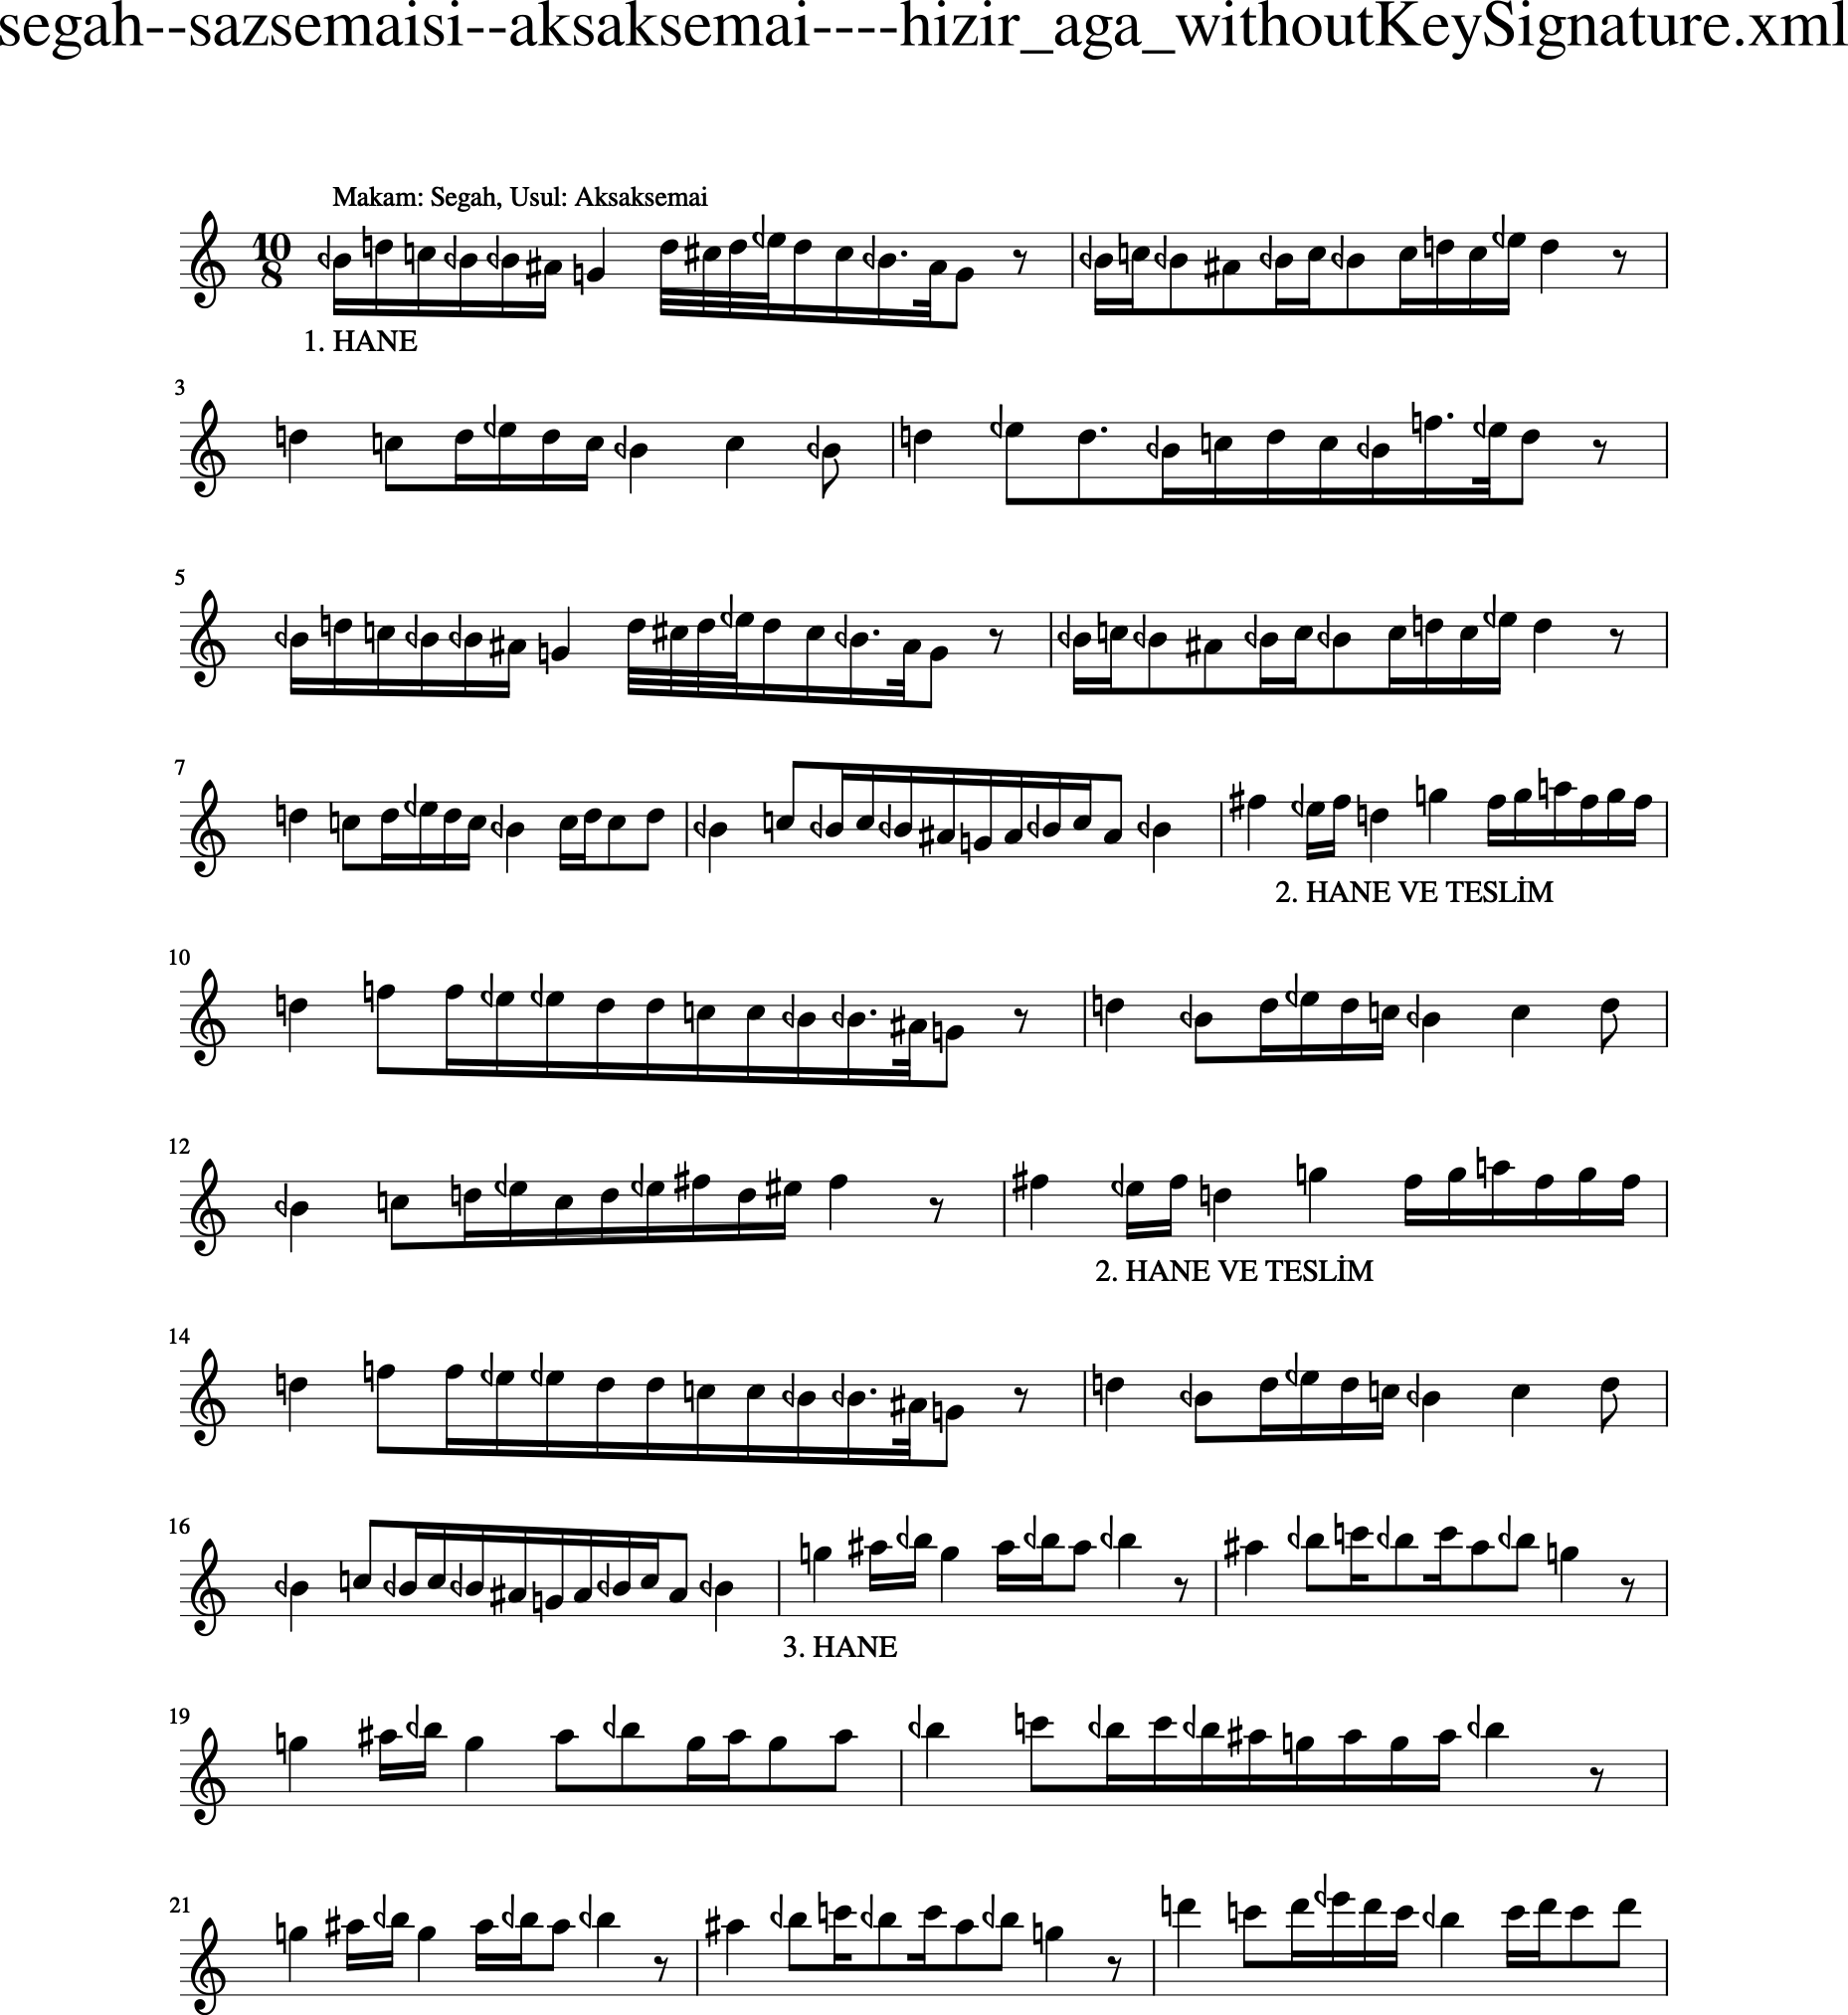

In [8]:
s = converter.parse(newMakamScore)
s.show()

In [153]:
print('This score contains these {} elements'.format(len(s.elements)))
for element in s.elements:
    print('-', element)

This score contains these 2 elements
- <music21.metadata.Metadata object at 0x7f0cd4bd0278>
- <music21.stream.Part Music>


In [154]:
scoreParts = s.parts.stream()
for element in scoreParts.elements:
    print(element)

<music21.stream.Part Music>


In [155]:
part0 = scoreParts[0]
print('Elements in part 0:', len(part0.elements))
part0.elements

Elements in part 0: 63


(<music21.instrument.Instrument 'P1: Music: '>,
 <music21.stream.Measure 1 offset=0.0>,
 <music21.stream.Measure 2 offset=5.0>,
 <music21.stream.Measure 3 offset=10.0>,
 <music21.stream.Measure 4 offset=15.0>,
 <music21.stream.Measure 5 offset=20.0>,
 <music21.stream.Measure 6 offset=25.0>,
 <music21.stream.Measure 7 offset=30.0>,
 <music21.stream.Measure 8 offset=35.0>,
 <music21.stream.Measure 9 offset=40.0>,
 <music21.stream.Measure 10 offset=45.0>,
 <music21.stream.Measure 11 offset=50.0>,
 <music21.stream.Measure 12 offset=55.0>,
 <music21.stream.Measure 13 offset=60.0>,
 <music21.stream.Measure 14 offset=65.0>,
 <music21.stream.Measure 15 offset=70.0>,
 <music21.stream.Measure 16 offset=75.0>,
 <music21.stream.Measure 17 offset=80.0>,
 <music21.stream.Measure 18 offset=85.0>,
 <music21.stream.Measure 19 offset=90.0>,
 <music21.stream.Measure 20 offset=95.0>,
 <music21.stream.Measure 21 offset=100.0>,
 <music21.stream.Measure 22 offset=105.0>,
 <music21.stream.Measure 23 offset=11

## Scale the offsets to 16th

In [85]:
def scale_to_16th(OldMin, OldMax, OldValue):
    NewMin = 0
    NewMax = 16    
    NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
    return NewValue

## Create Histograms to Analyse Note Dist.

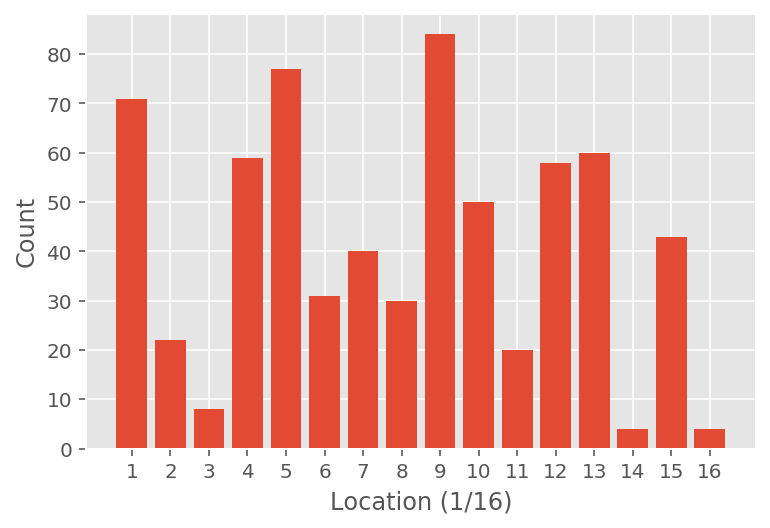

In [162]:
import math 
import numpy as np
import matplotlib.pyplot as plt

note_offsets = np.array([])
meter_bins = np.zeros(16)
beats_in_bar = measures0[1].offset

for m in measures0:
    
    #print('------------------------------------------------')
    #print('Measure number:', m.number, '\tMeasure offset:', m.offset)
    
    for n1 in m.elements: 
        note_offset = n1.offset
        note_offsets = np.append(note_offsets, note_offset)
        scaled_offset = scale_to_16th(0, beats_in_bar, note_offset)
        bin_val = math.floor(scaled_offset)
        meter_bins[bin_val] += 1

        """
        # Helper functionality for debugging
        print(type(n1))
        print('Measure number:', n1.measureNumber)
        print('Note offset:', n1.offset)
        print('Scaled offset:', scaled_offset)
        print('bin value:', bin_val)
        print('Is it a note?', n1.isNote)
        print('Is it a rest?', n1.isRest)
        print('')
        """

plt.style.use('ggplot')

bars = np.arange(1,17)
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, meter_bins)

plt.xlabel("Location (1/16)")
plt.ylabel("Count")
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()